## ARC 380 / CEE 380 – Introduction to Robotics for Digital Fabrication
## Session 14 Workshop
Princeton University, Spring 2024

Professor: Arash Adel | Assistant-in-Instruction: Daniel Ruan

---

# 1. Introduction to OpenCV

OpenCV (Open Source Computer Vision Library) is one of the most popular libraries used for computer vision tasks. It provides a wide range of tools and techniques for image and video processing, geometric transformations, color space conversion, histograms, and much more. OpenCV is written in C++ but has bindings for Python, Java, and other languages, making it accessible for many developers and researchers.

OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in commercial products. Being a BSD-licensed product, OpenCV makes it easy for businesses and researchers to utilize and modify the code.

Source: https://opencv.org/

## 1.1. Installation

Make sure you are in the arc380 environment, and install OpenCV using `pip`:

In [258]:
#%pip install opencv-python

### 1.1.1. Imports

The package name (namespace) for OpenCV in Python is `cv2`.

In [259]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Print version
print(cv2.__version__)

4.9.0


## 1.2. Reading and writing images

In [260]:
# Load an image from a file
img_path = 'test-image-3-29 - Copy.png'
# img_path = 'raw_image.png'
img = cv2.imread(img_path)

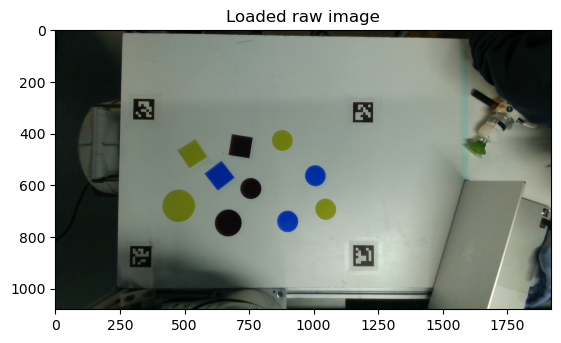

In [261]:
# Use matplotlib to display the image
plt.imshow(img)
plt.title('Loaded raw image')
plt.show()

Notice how the colors in this image look off. That is because the color spaces used for OpenCV and matplotlib are different. Matplotlib uses an RGB convention, which you are probably most familiar with, while OpenCV uses BGR.

BGR used to the convention of choice back when OpenCV was created in 2000, and it later became too embedded to change.

We can use the `cvtColor` function to convert between color spaces.

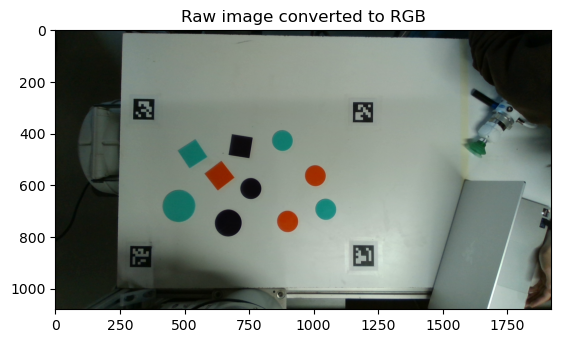

In [262]:
# Convert the image from BGR to RGB and display using matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Raw image converted to RGB')
plt.show()

There are also other color spaces, such as grayscale, HSV (Hue, Saturation, Value), etc.

Below, we convert and image to grayscale and save it.

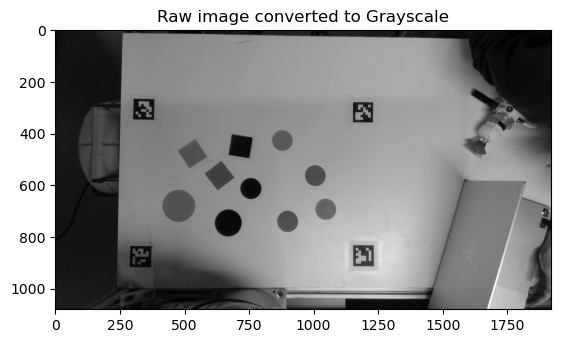

True

In [263]:
# Convert the image from BGR to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(img_gray, cmap='gray')
plt.title('Raw image converted to Grayscale')
plt.show()

# Save the grayscale image to a file
cv2.imwrite('gray_image.png', img_gray)

## 1.3. Accessing pixel values

As discussed in the Session 13 lecture, an image is just a 3D matrix (tensor). OpenCV utilizes NumPy arrays, so we can utilize any of the NumPy functions to view and edit the image.

In [264]:
print(f'Image matrix type: {type(img)}')
print(f'Matrix data type: {img.dtype}')
print(f'Image shape: {img.shape}')
print(f'First row of the image: \n{img[0]}')


Image matrix type: <class 'numpy.ndarray'>
Matrix data type: uint8
Image shape: (1080, 1920, 3)
First row of the image: 
[[10 18  6]
 [ 8 16  4]
 [ 9 17  5]
 ...
 [ 8 12 11]
 [ 9 13 12]
 [ 9 13 12]]


Color channel values are stored as an `unsigned integer` from 0-255.

Note how in the image shape, the first dimension is the image height, and the second dimension is image width. OpenCV uses a **row-major** order for images, which is typically how we work with NumPy matrices as well.

However, this means that the `u` and `v` coordinates of the pixels need to be flipped when accessing them.

In [265]:
u = 1100
v = 100

# Get the pixel value at location (u, v)
# Remember not only to reverse the order of the coordinates, but also the order of the color channels
b, g, r = img[v, u]

print(f'Pixel at ({u}, {v}) - Red: {r}, Green: {g}, Blue: {b}')

Pixel at (1100, 100) - Red: 156, Green: 166, Blue: 154


We can edit the image just like how we would any other NumPy array. Typically we will want to make a copy of the image first so that we always have access to the original.

Text(0.5, 1.0, 'Edited image')

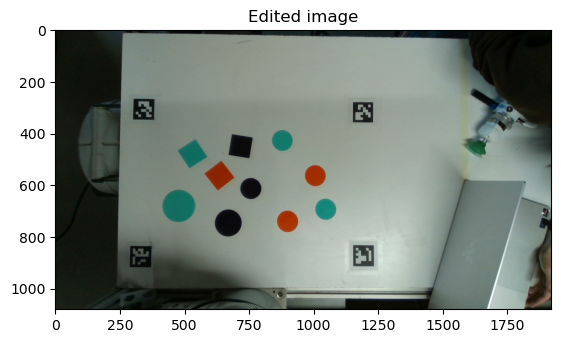

In [266]:
# Make a copy of the image
edited_img = img.copy()

# Change the pixel value at location (u, v) to red
edited_img[v, u] = (0, 0, 255)

# Remember to convert the image from BGR to RGB before displaying
plt.imshow(cv2.cvtColor(edited_img, cv2.COLOR_BGR2RGB))
plt.title('Edited image')

We only changed the value of a single pixel, so it can be a bit difficult to see. We can crop the image using array slicing to zoom into the changed region.

Text(0.5, 1.0, 'Cropped edited image')

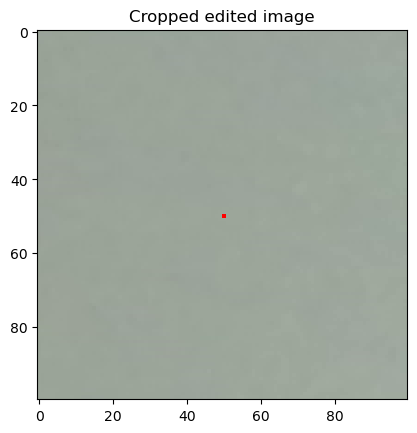

In [267]:
cropped_img = edited_img[v - 50 : v + 50, u - 50 : u + 50]

plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped edited image')

---

# 2. ArUco

ArUco markers are 2D binary square fiducial markers that are used for camera pose estimation, 3D positioning, and augmented reality applications. Each marker represents a unique ID that can be recognized through various orientations and distances, making them highly versatile for real-world applications. They are similar to QR codes but are designed specifically for speed and efficiency in computer vision tasks.

The typical ArUco marker consists of a black square with a specific internal binary pattern. The size of the marker and the contrast of the pattern allow for easy detection and identification by computer vision algorithms. These markers can be generated in various sizes and configurations, catering to different application needs.

The term "ArUco" derives from "AR University of Cordoba," where they were developed, and ArUco markers are incorporated into the OpenCV library.

## 2.1. Import ArUco

In [268]:
from cv2 import aruco

## 2.2. Detecting ArUco markers

In [269]:
# Load the predefined dictionary where our markers are printed from
dictionary = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

# Load the default detector parameters
detector_params = aruco.DetectorParameters()

# Create an ArucoDetector using the dictionary and detector parameters
detector = aruco.ArucoDetector(dictionary, detector_params)

In [270]:
# Run the detector on our input image
corners, ids, rejected = detector.detectMarkers(img)
#print(ids)
#print(corners)

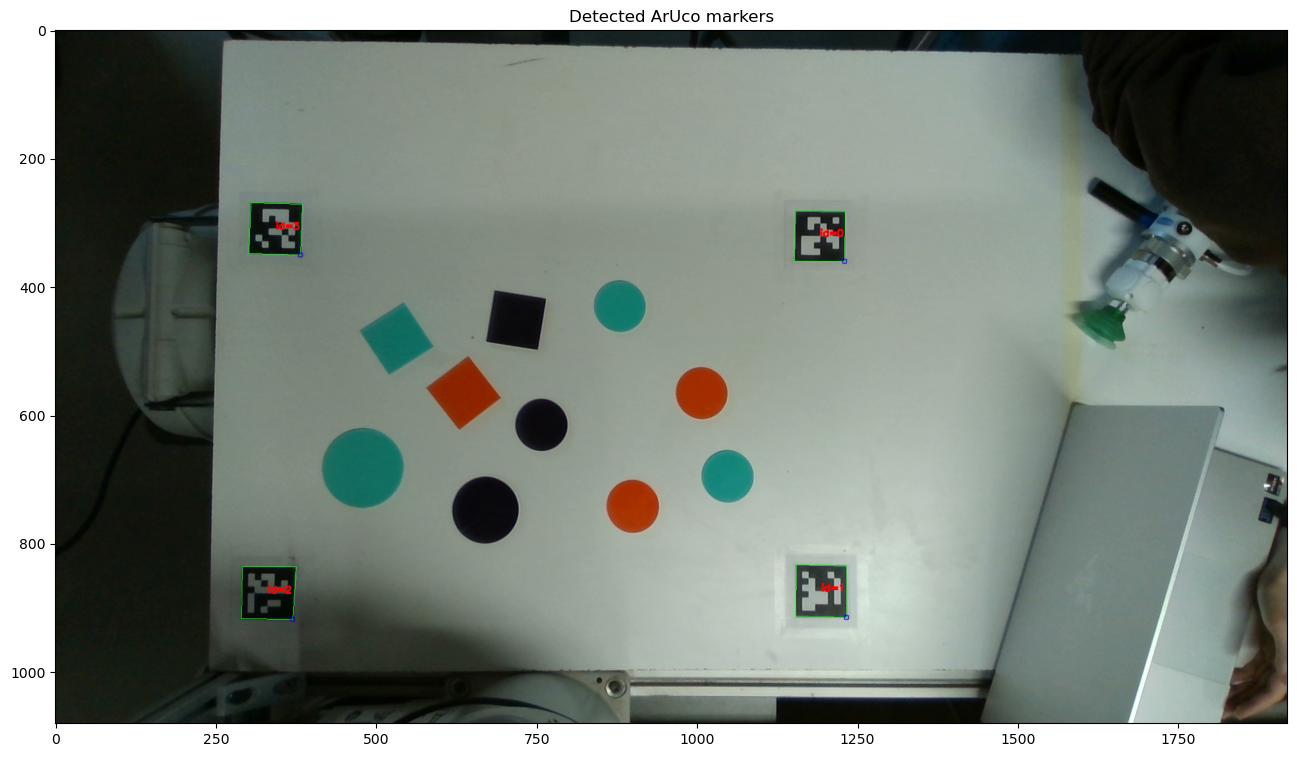

In [271]:
# Use the drawDetectedMarkers function to draw the detected markers on the image
markers_img = img_rgb.copy()
aruco.drawDetectedMarkers(markers_img, corners, ids)

plt.figure(figsize=(16,9))
plt.imshow(markers_img)
plt.title('Detected ArUco markers')
plt.show()

We can also visualize the rejected markers. These are the boundaries that the detect thought could be ArUco markers, but later rejected due to a low confidence score.

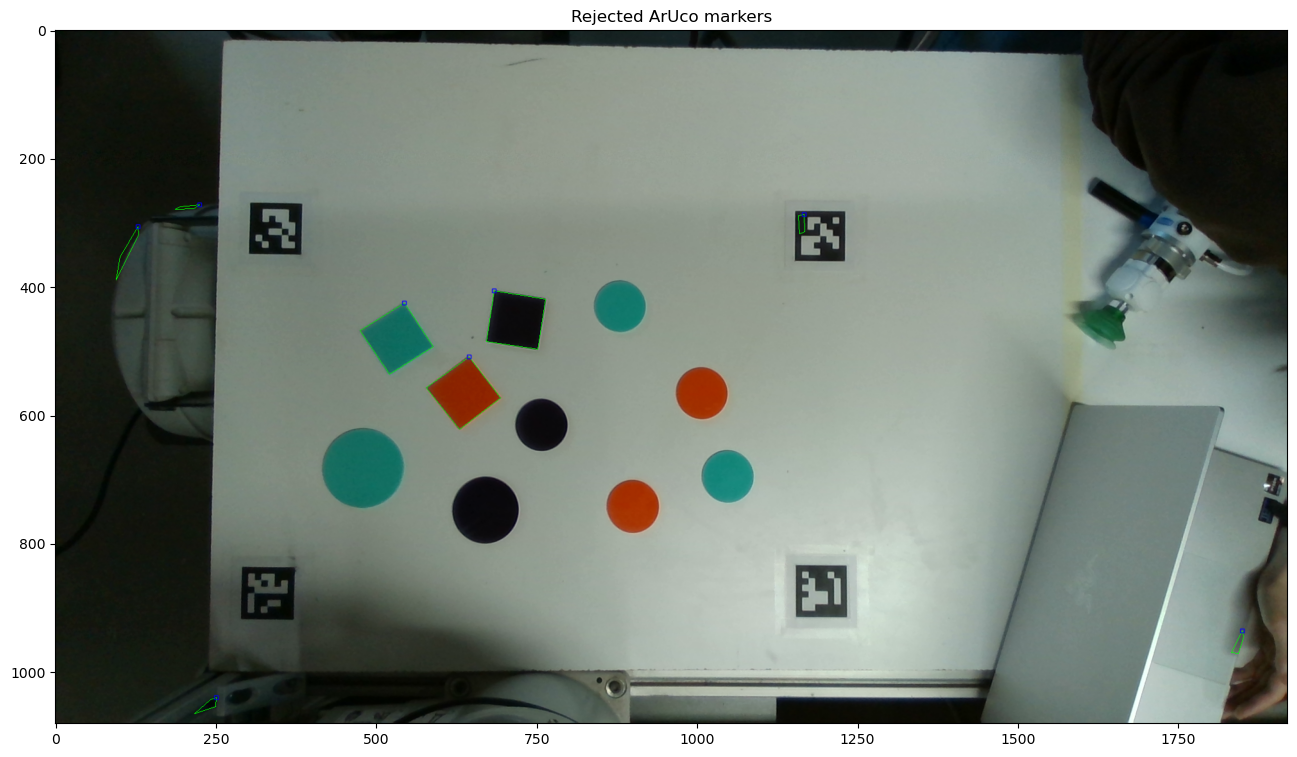

In [272]:
rejected_markers_img = img_rgb.copy()
aruco.drawDetectedMarkers(rejected_markers_img, rejected)

plt.figure(figsize=(16,9))
plt.imshow(rejected_markers_img)
plt.title('Rejected ArUco markers')
plt.show()

---

# 3. Perspective transformation

Assume that the task is to sort these colored shapes based on size (which will be part of the assignment). Our task space is essentially 2-dimensional, so before we begin a feature extraction, we should process the image so that it corresponds to the task frame. This includes:
- Transforming the image to remove perspective effects (i.e., warp the image so that it is orthogonal)
- Scaling the image to a known resolution
- Flipping the axes of the image so that they match the task frame
- Cropping out all unnecessary data

Because we designed and printed the page the ArUco markers are on, we know the following:
- The size (width and height of the bounding box) of each marker is 1 in.
- The width of our task space (from exterior marker corner to exterior marker corner) is 10 in.
- The height of our task space ("") is 7.5 in.

In practice, these markers would be printed and mounted individually, and you can teach the locations of each one (similar to the previous assignment).

In [273]:
# Define the dimensions of the output image
width = 19     # inches
height = 12    # inches
ppi = 96        # pixels per inch (standard resolution for most screens - can be any arbitrary value that still preserves information)

_ids = ids.flatten()
print(_ids)
print(np.argsort(_ids))

[2 3 1 0]
[3 2 0 1]


By default, the output from the ArUco detector is not sorted by ID number. We need to sort by ID then extract the corners that our output image boundary corresponds to.

In [280]:
# Sort corners based on id
ids = ids.flatten()
print(ids)

# Sort the corners based on the ids
corners = np.array([corners[i] for i in np.argsort(ids)])
print(corners.shape)

# Remove dimensions of size 1
corners = np.squeeze(corners)
print(corners)

# Sort the ids
ids = np.sort(ids)

# Extract source points corresponding to the exterior bounding box corners of the 4 markers
src_pts = np.array([corners[0][0], corners[1][1], corners[2][2], corners[3][3]], dtype='float32')
print(src_pts)
pts_img = img.copy()
for marker in src_pts:
    # print(marker)
    # for pt in marker:
    #     print(type(pt))
    pts_img = cv2.circle(pts_img, (pt[0], pt[1]), 5, (0, 0, 255), 2)


[0 1 2 3]
(4, 4, 2)
[[[1230.  360.]
  [1152.  360.]
  [1154.  282.]
  [1231.  283.]]

 [[1233.  915.]
  [1154.  913.]
  [1155.  833.]
  [1233.  835.]]

 [[ 370.  918.]
  [ 290.  917.]
  [ 292.  836.]
  [ 376.  836.]]

 [[ 382.  350.]
  [ 302.  348.]
  [ 305.  269.]
  [ 385.  271.]]]
[[1230.  360.]
 [1154.  913.]
 [ 292.  836.]
 [ 385.  271.]]
[1230.  360.]
<class 'numpy.float32'>


IndexError: invalid index to scalar variable.

Note that we are explicitly defining the dtype of the `src_pts` NumPy array as `float32`. If we did not include this, the array would be `uint8` (since it is in discritized pixel space) and the perspective transformation would incur truncation errors.

For the perspective transformation calculation, we also need the destination points that these source points need to map to (in corresponding order).

In [ ]:
# Define destination points as the corners of the output image
dst_pts = np.array([[0, 0], [0, height*ppi], [width*ppi, height*ppi], [width*ppi, 0]], dtype='float32')
print(dst_pts)

[[   0.    0.]
 [   0. 1152.]
 [1824. 1152.]
 [1824.    0.]]


We can then use OpenCV's `getPerspectiveTransform` function to get the transformation matrix $\mathbf{M}$ and apply it to the image.

[[-2.11802764e+00 -2.91085174e-01  2.70996466e+03]
 [-2.13887681e-01  2.03073136e+00 -4.67981440e+02]
 [-3.05703224e-05  2.65173720e-05  1.00000000e+00]]
(1080, 1920, 3)
(1080, 1920, 3)
1920


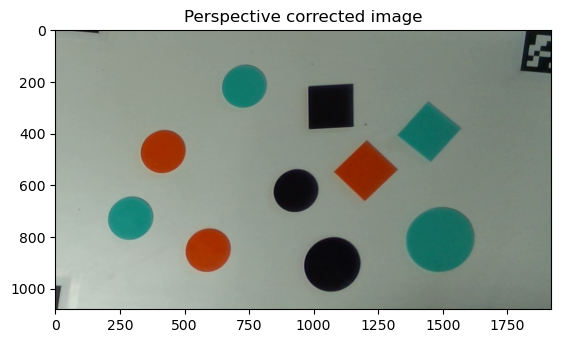

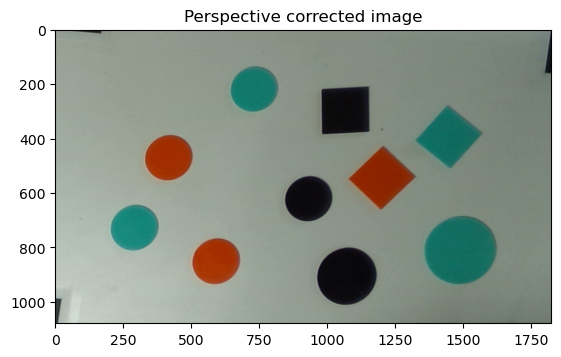

In [ ]:
# Compute the perspective transformation matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)
print(M)

# Apply the perspective transformation to the input image
print(img.shape)
print(img_rgb.shape)
print(img_rgb.shape[1])
corrected_img = cv2.warpPerspective(img, M, (img_rgb.shape[1], img_rgb.shape[0]))
plt.imshow(cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB))
plt.title('Perspective corrected image')
plt.show()

# Crop the output image to the specified dimensions
corrected_img = corrected_img[:int(height*ppi), :int(width*ppi)]

plt.imshow(cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB))
plt.title('Perspective corrected image')
plt.show()

Note how the image is now mirrored vertically. Our task frame is located at the frame of the id=0 marker (in the top left corner of the image), which is now properly centered at the origin. The task frame x-axis was already aligned with the image x-axis, and therefore did not need changing. The image y-axis, however, had to be flipped, which causes this mirroring.

We can flip the matplotlib y-axis for illustration purposes (this does not alter the image).

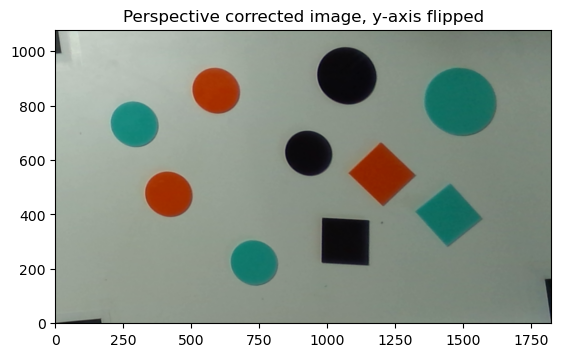

In [ ]:
plt.imshow(cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB))
plt.title('Perspective corrected image, y-axis flipped')
plt.gca().invert_yaxis()
plt.show()

---

# 4. Pixel classification (via k-means clustering)

Now that we have our corrected image of the task space, we can start extracting features for our sorting task. For the following example, we are going to find the 2D position of the dark green disk in the task space.

First, we need to classify the image. Since we have several distinct colors, we can try using k-means clustering. There are 4 different colors of objects + the black ArUco markers + the (poorly lit) white background. This means doing k-means with `k=6` is a reasonable starting point.

We can use the kmeans function built into OpenCV:

In [ ]:
# Run k-means clustering on the image

# Reshape our image data to a flattened list of RGB values
img_data = corrected_img.reshape((-1, 3))
img_data = np.float32(img_data)

# Define the number of clusters
k = 6

# Define the criteria for the k-means algorithm
# This is a tuple with three elements: (type of termination criteria, maximum number of iterations, epsilon/required accuracy)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Run the k-means algorithm
# Parameters: data, number of clusters, best labels, criteria, number of attempts, initial centers
_, labels, centers = cv2.kmeans(img_data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

print(f'Labels shape: {labels.shape}')
print(f'Centers shape: {centers.shape}')
print(f'Centers: \n{centers}')

Labels shape: (1969920, 1)
Centers shape: (6, 3)
Centers: 
[[103.17281  114.72905   26.320328]
 [126.49206  138.2782   127.78083 ]
 [  7.911386  47.96487  151.43135 ]
 [147.60701  160.34935  150.47406 ]
 [178.64278  188.64948  178.74927 ]
 [ 18.410923  14.383801  15.037854]]


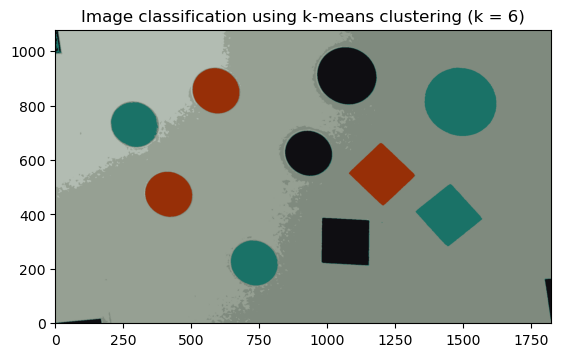

In [ ]:
# The output of the k-means algorithm gives the centers as floating point values
# We need to convert these back to uint8 to be able to use them as pixel values
centers = np.uint8(centers)

# Rebuild the image using the labels and centers
kmeans_data = centers[labels.flatten()]
kmeans_img = kmeans_data.reshape(corrected_img.shape)
labels = labels.reshape(corrected_img.shape[:2])

# Display the k-means image
plt.imshow(cv2.cvtColor(kmeans_img, cv2.COLOR_BGR2RGB))
plt.title(f'Image classification using k-means clustering (k = {k})')
plt.gca().invert_yaxis()
plt.show()

Note how the output of the k-means clustering is not exactly what we want. The clustering classified the background white into two different shades, and grouped the dark green disk and ArUco markers into the same cluster.

This is okay though, since we can use our knowledge of the features to identify the correct region for the disk.

The labels from the k-means clustering is not sorted in any way, so we need to first identify which label corresponds to the dark green color.

In [ ]:
# Identify the cluster that is closest to the dark green color
dark_green = np.array([0, 100, 0])
distances = np.linalg.norm(centers - dark_green, axis=1)
green_cluster_label = np.argmin(distances)

print(f'Label of the cluster closest to dark green: {green_cluster_label}')

Label of the cluster closest to dark green: 5


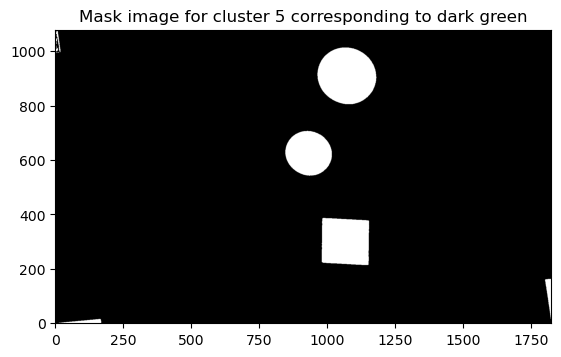

In [ ]:
# Create a mask image for this label
# All pixels that belong to this cluster will be white, and all others will be black
mask_img = np.zeros(kmeans_img.shape[:2], dtype='uint8')
mask_img[labels == green_cluster_label] = 255

plt.imshow(mask_img, cmap='gray')
plt.title(f'Mask image for cluster {green_cluster_label} corresponding to dark green')
plt.gca().invert_yaxis()
plt.show()

We can now segment the cluster into separate regions (objects). To do so, we use the `findContours` function.

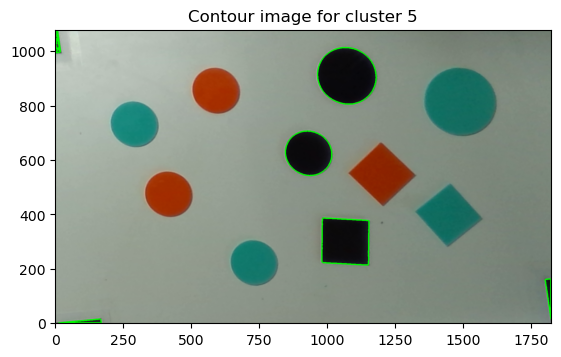

In [ ]:
# Segment continuous regions
# Parameters: input image, contour retrieval mode, contour approximation method
contours, _ = cv2.findContours(mask_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Visualize the contours
# Parameters for drawContours: input image, contours, contour index (-1 means all contours), color, thickness
contour_img = corrected_img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title(f'Contour image for cluster {green_cluster_label}')
plt.gca().invert_yaxis()
plt.show()

With the contours, we can start computing different feature descriptors. For example, we know the actual size of the disc (1" radius), and so we know how many pixels large it should be. We can compare the area of each region to this expected area to determine which one corresponds to the disk.

In [ ]:
# Get area of each region
areas = [cv2.contourArea(contour) for contour in contours]
print(f'Area of each region: {areas}')

# Calculate the expected pixel area of a circle with radius 1
radius = 1
expected_area = radius**2 * np.pi * ppi**2
print(f'Expected area for 1 in radius circle: {expected_area}')

Area of each region: [2.5, 0.0, 555.0, 7.0, 34996.0, 21677.5, 28078.5, 1488.0, 1092.5]
Expected area for 1 in radius circle: 28952.917895483533


Something else we can do is calculate the 'roundness' of each region. The formula for roundness is:

$\text{roundness} = \frac{4\pi \times \text{area}}{\text{perimeter}^2}$

A roundness of 1 means a perfect circle, while values close to 0 are very far from circular.

In [ ]:
perimeters = [cv2.arcLength(contour, closed=True) for contour in contours]

# Calculate the roundness of each contour
roundness = []
for i, contour in enumerate(contours):
    roundness.append((4 * np.pi * areas[i]) / perimeters[i]**2)

print(f'Roundness of each region: {roundness}')

Roundness of each region: [0.354471875200353, 0.0, 0.05911522676206774, 0.09255612639323366, 0.8926517909326249, 0.8856440789668918, 0.7657478596605048, 0.1826722845944238, 0.12757729419409766]


Closest area index: 6
Roundest index: 4


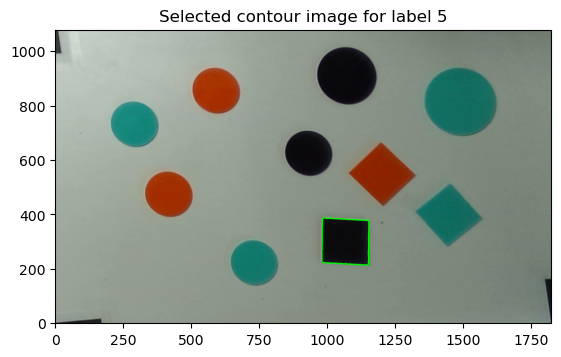

In [ ]:
# Find the contour with the closest area to the expected area
closest_area_idx = np.argmin(np.abs(np.array(areas) - expected_area))

# Alternatively, find the roundest contour
roundest_idx = np.argmax(roundness)

# These should theoretically be the same for this example
print(f'Closest area index: {closest_area_idx}')
print(f'Roundest index: {roundest_idx}')

# Visualize the selected contour
selected_contour_img = corrected_img.copy()
cv2.drawContours(selected_contour_img, contours, closest_area_idx, (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(selected_contour_img, cv2.COLOR_BGR2RGB))
plt.title(f'Selected contour image for label {green_cluster_label}')
plt.gca().invert_yaxis()
plt.show()

Finally, we can compute the centroid of the region to determine the 2D position of the disk in the task space, either using a bounding box or through moments.

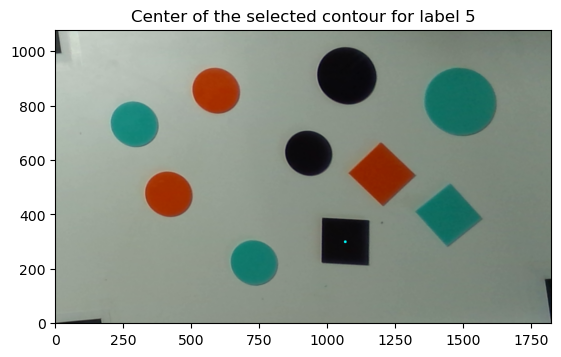

In [ ]:
selected_contour = contours[closest_area_idx]

# Get the center using a bounding box
x, y, w, h = cv2.boundingRect(selected_contour)
u_c = x + w//2
v_c = y + h//2

# Alternate method:
# Get the center of the selected contour using the moments
moments = cv2.moments(selected_contour)
u_c = int(moments['m10']/moments['m00'])
v_c = int(moments['m01']/moments['m00'])


# Draw the center of the selected contour
center_img = corrected_img.copy()
cv2.circle(center_img, (u_c, v_c), 5, (255, 255, 0), -1)

plt.imshow(cv2.cvtColor(center_img, cv2.COLOR_BGR2RGB))
plt.title(f'Center of the selected contour for label {green_cluster_label}')
plt.gca().invert_yaxis()
plt.show()

Last last step, we convert the pixel coordinates into real-world units. In the assignment, you will also need to transform these coordinates from the task space to the world space for the robot.

In [ ]:
# Convert pixels to inches
x_in = u_c / ppi
y_in = v_c / ppi

# Inches to mm
x_mm = x_in * 25.4
y_mm = y_in * 25.4

# 2D position of the dark green disk relative to the task frame
p_task = (x_mm, y_mm)

print(p_task)

(282.31041666666664, 78.84583333333333)


---

# Excercise
Find the local frame of the blue square (which measures 2" on each side).

You can use `cv2.minAreaRect` to find the rotated minimum area bounding rectangle for a contour. This function returns a tuple of (center_pt, dimensions, angle).

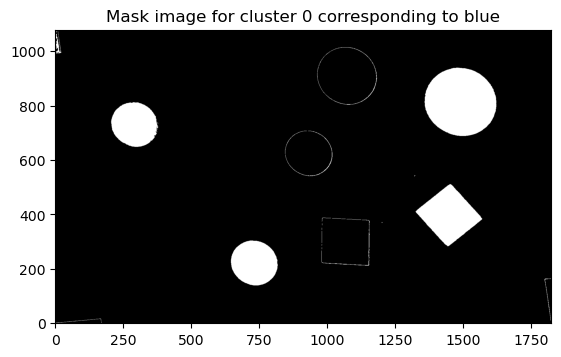

In [ ]:
# Identify the cluster that is closest to the blue and create an image mask for it
blue = np.array([255, 0, 0])
distances = np.linalg.norm(centers - blue, axis=1)
blue_cluster_label = np.argmin(distances)

mask_img = np.zeros(kmeans_img.shape[:2], dtype='uint8')
#print(mask_img)
mask_img[labels == blue_cluster_label] = 255

plt.imshow(mask_img, cmap='gray')
plt.title(f'Mask image for cluster {blue_cluster_label} corresponding to blue')
plt.gca().invert_yaxis()
plt.show()

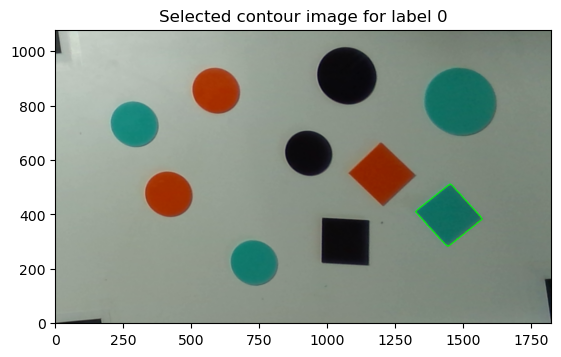

In [ ]:
# Contour the mask image and identify the region corresponding to the blue square
contours, _ = cv2.findContours(mask_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

areas = [cv2.contourArea(contour) for contour in contours]
expected_area = 2*2 * ppi**2
closest_area_idx = np.argmin(np.abs(np.array(areas) - expected_area))

# Visualize the selected contour (optional)
selected_contour_img = corrected_img.copy()
cv2.drawContours(selected_contour_img, contours, closest_area_idx, (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(selected_contour_img, cv2.COLOR_BGR2RGB))
plt.title(f'Selected contour image for label {blue_cluster_label}')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Find the center of the selected contour
selected_contour = contours[closest_area_idx]
moments = cv2.moments(selected_contour)
u_c = int(moments['m10']/moments['m00'])
v_c = int(moments['m01']/moments['m00'])

x_in = u_c / ppi
y_in = v_c / ppi
x_mm = x_in * 25.4
y_mm = y_in * 25.4

p_task = (x_mm, y_mm)

print(p_task)

(383.1166666666667, 104.51041666666666)


In [ ]:
# Use minAreaRect to find the orientation of the blue square
rect = cv2.minAreaRect(selected_contour) # minAreaRect returns a Box2D structure. A Box2D structure is a tuple of ((x, y), (w, h), angle).
print(rect)
angle = rect[2]

print(angle)

((1448.3525390625, 395.62615966796875), (167.37408447265625, 184.65322875976562), 41.87786865234375)
41.87786865234375


Code for visualizing the frame has been provided below. Change `center` (in pixels) and `angle_rad` to your computed values.

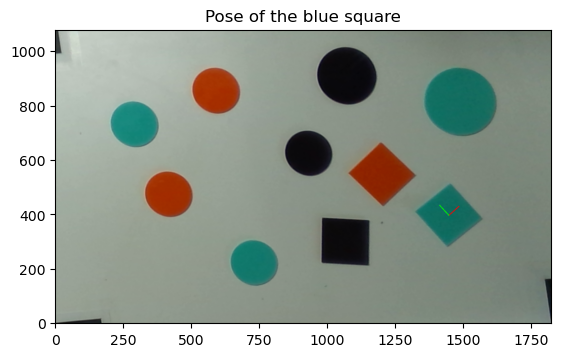

In [ ]:
# Parameters
center = rect[0]     # Center of the blue square (in pixels)
center = (int(center[0]), int(center[1])) # Convert to integer
#print(center)
angle_rad = np.deg2rad(angle)      # Orientation angle of the blue square (in radians)
length = 50         # The length of the frame axes

# Create a blank image
blue_square_pose_img = corrected_img.copy()
#print(blue_square_pose_img)

# Calculate the end points of each axis
# X-axis (you could change color later if needed)
end_x = (int(center[0] + length * np.cos(angle_rad)), int(center[1] + length * np.sin(angle_rad)))
# Y-axis (rotate the angle by 90 degrees or pi/2 radians for the perpendicular)
end_y = (int(center[0] + length * np.cos(angle_rad + np.pi/2)), int(center[1] + length * np.sin(angle_rad + np.pi/2)))

# Draw the axes
cv2.line(blue_square_pose_img, center, end_x, (0, 0, 255), 2)
cv2.line(blue_square_pose_img, center, end_y, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(blue_square_pose_img, cv2.COLOR_BGR2RGB))
plt.title(f'Pose of the blue square')
plt.gca().invert_yaxis()
plt.show()